In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
# laod data
file_name = 'clean_BE_df.parquet'

data = pd.read_parquet(file_name)
data.head(n=15)

,Pieces,Minifigs,Retail,Value,LEGO,Amazon,Bricklink,StockX,eBay,Exclusive,Promotional,Years
75385 Battle on Peridea,382.0,5,54.99,54.99,1,1,0,0,1,0,0,1
75357 Ghost & Phantom II,1394.0,4,159.99,159.99,1,1,0,1,1,0,0,2
75364 New Republic E-wing vs. Shin Hati's Starfighter,1056.0,5,109.99,88.47,0,1,0,1,1,0,0,2
75362 Ahsoka Tano's T-6 Jedi Shuttle,599.0,4,79.99,79.99,1,1,0,1,1,0,0,2
75338 Ambush on Ferrix,679.0,3,69.99,76.01,0,1,1,1,1,0,0,3
75226 Inferno Squad Battle Pack,118.0,4,14.99,59.88,0,1,1,0,1,0,0,6
75134 Galactic Empire Battle Pack,109.0,4,12.99,52.97,0,1,1,1,1,0,0,9
75133 Rebel Alliance Battle Pack,101.0,4,12.99,39.41,0,1,1,0,1,0,0,9
11912 Star Wars Build Your Own Adventure Parts,69.0,1,11.99,19.99,0,1,0,0,1,0,0,9
75253 Droid Commander,1177.0,0,199.99,207.19,0,1,0,1,1,0,0,6


In [3]:
data.describe()

,Pieces,Minifigs,Retail,Value,LEGO,Amazon,Bricklink,StockX,eBay,Exclusive,Promotional,Years
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,471.862881,2.975069,53.806385,277.502618,0.069252,0.887812,0.700831,0.533241,0.988920,0.005540,0.128809,10.691136
std,748.798532,3.163933,85.375364,768.022074,0.254058,0.315817,0.458211,0.499240,0.104751,0.074277,0.335220,6.631171
min,0.000000,0.000000,0.000000,4.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.250000,1.000000,9.990000,37.682500,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
50%,244.000000,3.000000,29.990000,85.125000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.000000
75%,566.500000,4.000000,69.990000,210.387500,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,14.000000
max,7541.000000,27.000000,849.990000,9895.160000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000


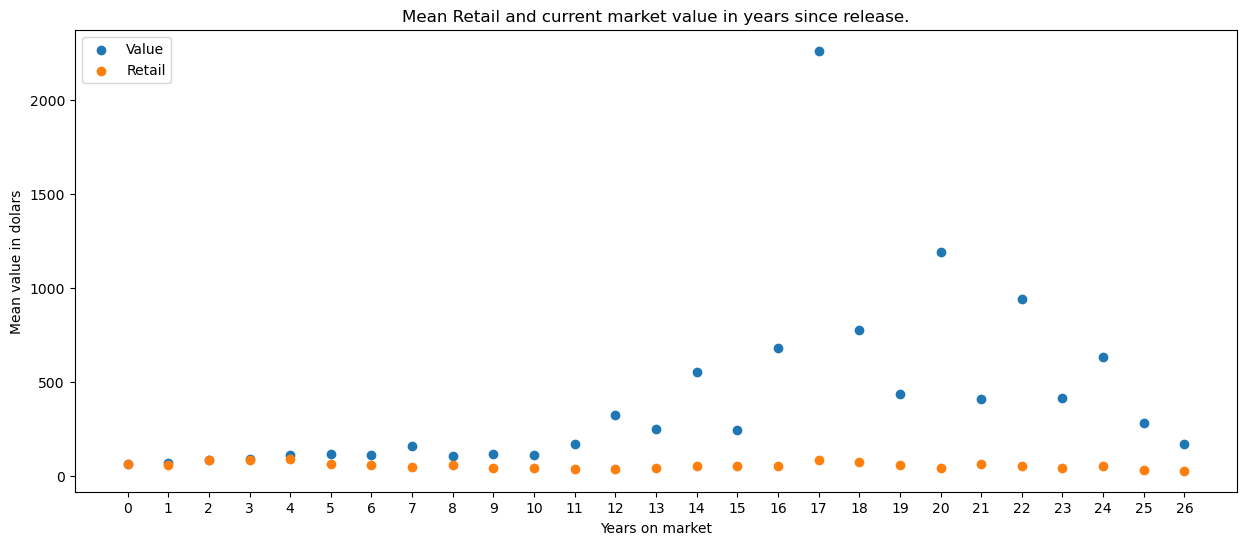

In [4]:
temp = data.groupby(['Years']).mean()[['Value', 'Retail']]

plt.figure(figsize=(15, 6))
plt.scatter(x = temp.index, y = 'Value', data = temp)
plt.scatter(x = temp.index, y = 'Retail', data = temp)
plt.legend(loc = 'upper left')
plt.xlabel('Years on market')
plt.ylabel('Mean value in dolars')
plt.title('Mean Retail and current market value in years since release.')
plt.xticks(temp.index)
plt.show()

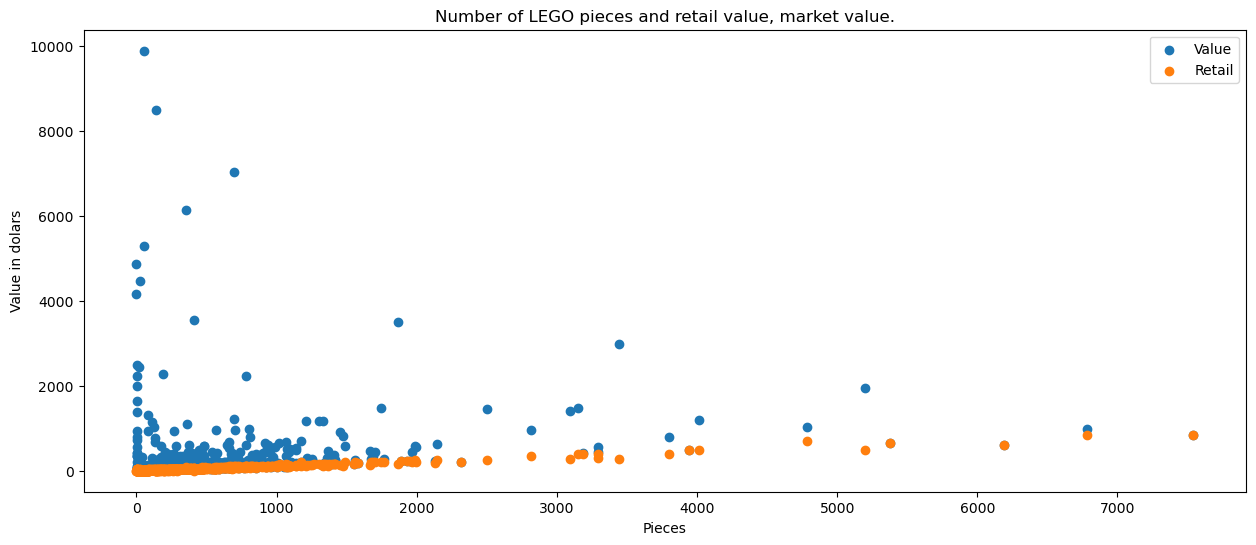

In [5]:
plt.figure(figsize=(15, 6))
plt.scatter(x = 'Pieces', y = 'Value', data = data)
plt.scatter(x = 'Pieces', y = 'Retail', data = data)
plt.legend(loc = 'upper right')
plt.xlabel('Pieces')
plt.ylabel('Value in dolars')
plt.title('Number of LEGO pieces and retail value, market value.')
plt.show()


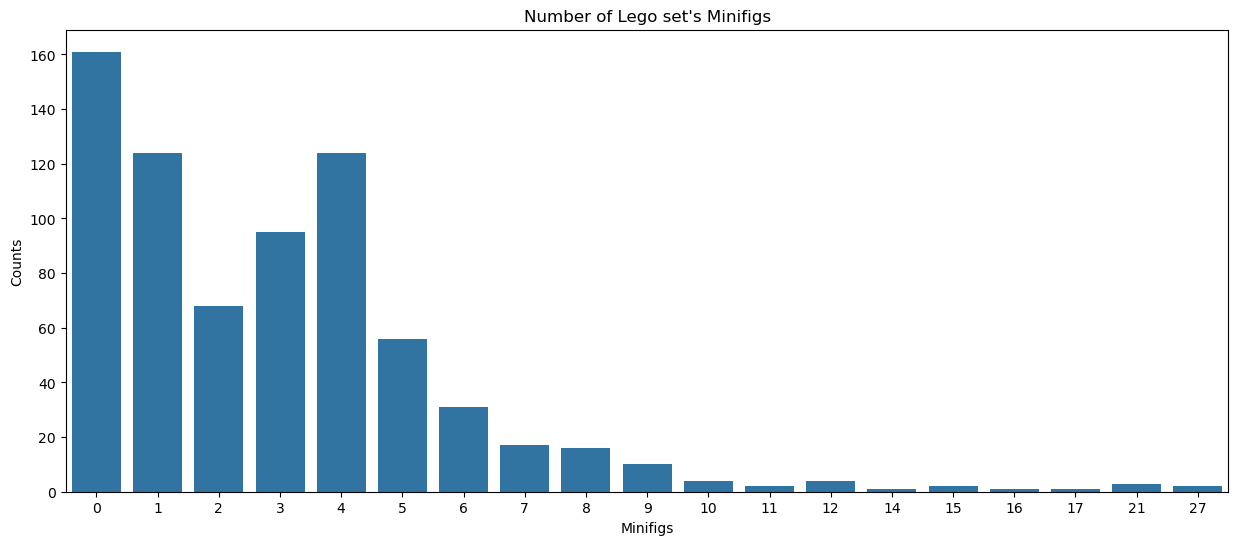

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(data, x = 'Minifigs')
plt.title("Number of Lego set's Minifigs")
plt.ylabel('Counts')
plt.xlabel('Minifigs')
plt.show()

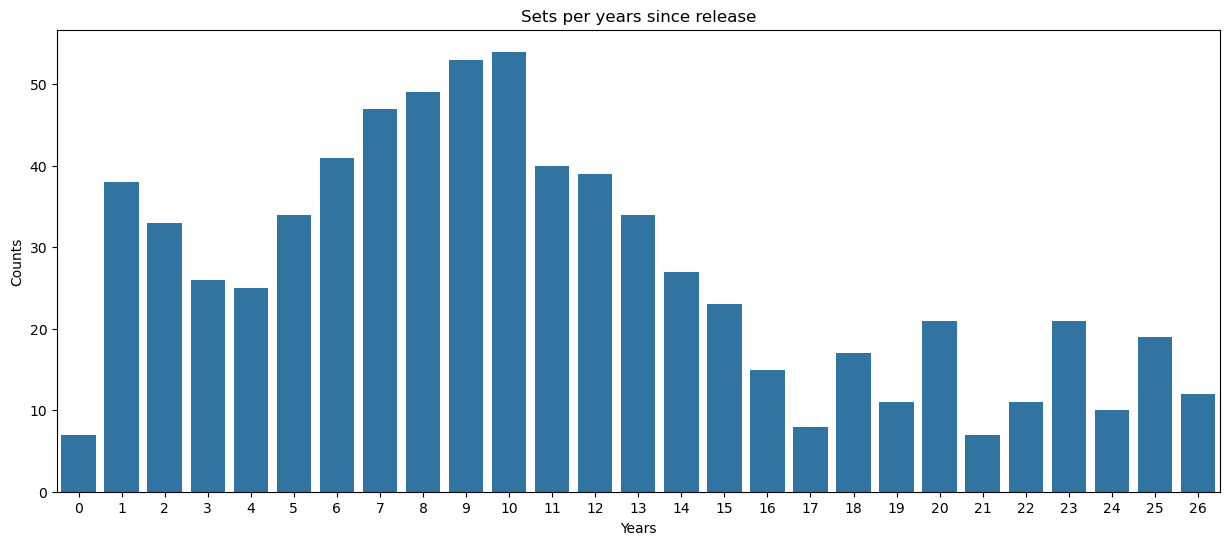

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(data, x = 'Years')
plt.title("Sets per years since release")
plt.ylabel('Counts')
plt.xlabel('Years')
plt.show()

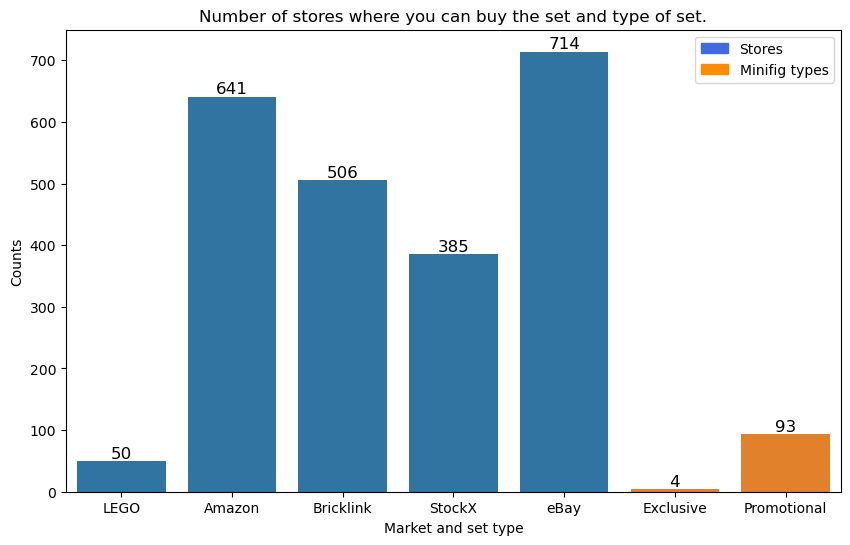

In [8]:
counts = data[['LEGO', 'Amazon', 'Bricklink', 'StockX', 'eBay', 'Exclusive', 'Promotional']].sum()


default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
blue, orange = default_colors[0], default_colors[1]
colors = [blue] * (len(counts) - 2) + [orange] * 2

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12)
legend_patches = [
    mpatches.Patch(color='royalblue', label='Stores'),
    mpatches.Patch(color='darkorange', label='Minifig types')
]
plt.legend(handles=legend_patches, loc='upper right')
plt.xlabel('Market and set type')
plt.ylabel('Counts')
plt.title('Number of stores where you can buy the set and type of set.')
plt.show()